# Project Team 1: Caroline Liongosari, Yueqi Su, Daniel Zhang 
## Determining Factual and Non-Factual News Articles 

### Overview and Motivation: 
Provide an overview of the project goals and motivation for it. Consider that this will be read by people who did not see your project proposal.

In the past several years, people all around the world have realized that fake news can daramatically affect society whether that may be through poltiical issue or business decisions. Due to this, people are becoming more skeptical of information that they read online. One way they address this is by filtuering out news articles that are biased towards or against a particular issue. In order words, they filter out non-factual news articles. 

The goal of this project is to streamline this process by a GUI that would be able to classify news article text as factual or non-factual. In order to do this, we would be implementing a classification machine learning algorithm. 

We decided to test two different classifiers: Naive Bayes and Logistic Regression. We compared the accuracy of the two classifiers and found that Naive Bayes was more accurate than Logistic Regression for our sample data, so we implemented it in our GUI. 

### Data: 
Source, scraping method, cleanup, etc.

Our project group was able to use a dataset generously given to us by researchers Ishan Sahu and Debapriyo Majumdar from the Indian Statistical Institute Kolkata who did a similar project as ours in 2017. The researchers derived their dataset from the Signal Media One-Million News Articles Dataset. Their cleaned and annotated version of this dataset was provided to us. The dataset consists of 98 news articles in forms of text files and has 3 parts:
*  **Article Text Length**: the number of characters present in the news article
* **Article Text**: the complete text of the news article
* **Unit tags**: the factual, non-factual annotations in the format: 
    * Character position start : Character position end: Annotation
    * example: 502:634:FACTUAL implies that the article text from character position 502 to 634 is fact

In [1]:
#importing all the necessary packages for the project
import glob
import csv
import re
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud 


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#stopWords is the list of stopWords we will use to filter our dataset
#The SnowballStemmer will be used to stem all the remaining words in the dataset 
stopWords = set(stopwords.words('english'))
stemmer =SnowballStemmer('english')

**Format change: ** After importing all the necessary files, we changed the format of the original dataset (which were only txt files) into a csv file with 2 columns: 1 with sentences or phrases and the other with the corresponding tag (FACT or NON_FACTUAL)

In [3]:
# parsedData is a 2-D array with entries: [annotatedString, annotation]
parsedData = []
path = '/home/student/Documents/Project/annotated-news/*.txt'
files = glob.glob(path)

for file in files:
    f = open(file,'r')
    inputString = f.read()
    
    # inputArray: 
    # [0-2] holds ArticleTextLength.
    # [3-5] holds ArticleText.
    # [6-end] holds UnitTags.
    inputArray = inputString.split('\n')
    articleText = inputArray[4]
    unitTag = []
    
    # inputArray[6] = "<UnitTags>"
    # inputArray[7] = start of actual Unit Tags.
    i = 7
    while i<(len(inputArray)-2):
        unitTag.append(inputArray[i])
        i+=1
    
    for indexes in unitTag:
        # temp = [Character position start, Character position end, Annotation]
        temp = indexes.split(':')
        rawText = articleText[int(temp[0]):int(temp[1])-1]
        #newRawText = "u'"+rawText+"'"
        
        processedText = re.sub('\\\\u[a-zA-Z0-9]{4}',"",rawText)
        #processedText = unidecode(newRawText)
        #parsedData.append([articleText[int(temp[0]):int(temp[1])-1], temp[2]])
        parsedData.append([processedText, temp[2]])
    
    f.close()
   

The following code below saves the formatted dataset into a .csv called dataset.csv inside a Project folder within Documents (if a Project folder doesn't exist inside folder, please make one now to run this code) 

In [4]:
with open("/home/student/Documents/Project/dataset.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(parsedData)

The dataset csv file is then converted to two dataframes: df and dff (df will contain the data in its original form without any changes to the words while dff contains the words that are filtered to not contain stopwords and the words are stemmed using Snowball Stemmer)

In [5]:
#create dataframe for the sentences and tags; df will be the dataframe without filtering for stopwords
#dff has stopwords taken out and the rest of the words are stemmed 
csv_file = "/home/student/Documents/Project/dataset.csv"
df = pd.read_table(csv_file, sep = ',', names = ['Sentence','Tag'])
dff = pd.read_table(csv_file, sep = ',', names = ['Sentence','Tag'])
#tokenData = [] # With stopwords.
#tokenDataFiltered = [] # Without stopwords.
#for index, row in df.iterrows():
#    tokenizer = RegexpTokenizer(r'\w+')
#    tokenizedSentence = tokenizer.tokenize(row['Sentence']) 
##   tokenData.append([tokenizedSentence, row['Tag']])
  #  wordsFiltered = [] # Temporary holding array for filtered tokens.
    # Filtering stopwords.
  #  for w in tokenizedSentence:
  #      if w not in stopWords:
    #        wordsFiltered.append(w)
    #tokenDataFiltered.append([wordsFiltered, row['Tag']])        



#with open("/home/student/Documents/Project/tokenized.csv","w+") as my_csv:    
#    csvWriter = csv.writer(my_csv,delimiter=',')
#    csvWriter.writerows(tokenData)

#with open("/home/student/Documents/Project/tokenizedNoStopwords.csv","w+") as my_csv:    
#    csvWriter = csv.writer(my_csv,delimiter=',')
#    csvWriter.writerows(tokenDataFiltered)

#cleaning the words in the dff dataframe
s = pd.Series ([[]], index=df.index)
dff['Sentence'] = dff['Sentence'].str.lower().str.split().mask(dff['Sentence'].isnull(),s)

#take out the stopwords
dff['Sentence'] = dff['Sentence'].apply(lambda x:' '.join([item for item in x if item not in stopWords]))

#stem the remaining words
dff['Sentence'] = dff['Sentence'].str.lower().str.split().mask(dff['Sentence'].isnull(),s)
dff['Sentence'] = dff['Sentence'].apply(lambda x: ' '.join([stemmer.stem(item) for item in x]))

In [6]:
#Show that the dataframes were created successfully
df.head(20)

,Sentence,Tag
0,We feel like it's our time to step up and prov...,NON_FACTUAL
1,"Since bursting onto the scene in 2003, All Tim...",FACTUAL
2,She even integrates Japanese manga cartoon art...,FACTUAL
3,"The song and its artsy, highly metaphoric vide...",NON_FACTUAL
4,Marie insists that she doesn't write songs for...,NON_FACTUAL
5,Ariana Grande faced backlash in July after a v...,FACTUAL
6,"The 22-year-old pop star, who was dressed in a...",NON_FACTUAL
7,"But, you know as human beings, we all say and ...",NON_FACTUAL
8,"But, you know as human beings, we all say and ...",NON_FACTUAL
9,The brunette beauty chose to put her sun-kisse...,NON_FACTUAL


In [7]:
#dff is created successfully with the stopwords taken out and the remaining words stemmed
dff.head(20)

,Sentence,Tag
0,feel like time step prove world sinc futur hea...,NON_FACTUAL
1,"sinc burst onto scene 2003, time low releas si...",FACTUAL
2,even integr japanes manga cartoon art videos; ...,FACTUAL
3,"song artsy, high metaphor video reflect singer...",NON_FACTUAL
4,mari insist write song world experi enjoy.,NON_FACTUAL
5,ariana grand face backlash juli video releas s...,FACTUAL
6,"22-year-old pop star, dress sexi multicolor mi...",NON_FACTUAL
7,"but, know human beings, say thing mean sometim...",NON_FACTUAL
8,"but, know human beings, say thing mean sometim...",NON_FACTUAL
9,brunett beauti chose put sun-kiss leg full dis...,NON_FACTUAL


We can also analyze total word count in factual and non-factual articles both with stopwords and without stopwords.

In [8]:
# Counting number of tokens in each sentence with stopwords included.
num_of_words = []
for index, row in df.iterrows():
    num_of_words.append(len(row['Sentence'].split()))
df['Word Count'] = num_of_words
df.head(20)

,Sentence,Tag,Word Count
0,We feel like it's our time to step up and prov...,NON_FACTUAL,27
1,"Since bursting onto the scene in 2003, All Tim...",FACTUAL,56
2,She even integrates Japanese manga cartoon art...,FACTUAL,60
3,"The song and its artsy, highly metaphoric vide...",NON_FACTUAL,27
4,Marie insists that she doesn't write songs for...,NON_FACTUAL,17
5,Ariana Grande faced backlash in July after a v...,FACTUAL,20
6,"The 22-year-old pop star, who was dressed in a...",NON_FACTUAL,24
7,"But, you know as human beings, we all say and ...",NON_FACTUAL,112
8,"But, you know as human beings, we all say and ...",NON_FACTUAL,70
9,The brunette beauty chose to put her sun-kisse...,NON_FACTUAL,23


In [9]:
# Counting number of tokens in each sentence without stopwords included.
num_of_wordsf = []
for index, row in dff.iterrows():
    num_of_wordsf.append(len(row['Sentence'].split()))
dff['Word Count'] = num_of_words
dff.head(20)

,Sentence,Tag,Word Count
0,feel like time step prove world sinc futur hea...,NON_FACTUAL,27
1,"sinc burst onto scene 2003, time low releas si...",FACTUAL,56
2,even integr japanes manga cartoon art videos; ...,FACTUAL,60
3,"song artsy, high metaphor video reflect singer...",NON_FACTUAL,27
4,mari insist write song world experi enjoy.,NON_FACTUAL,17
5,ariana grand face backlash juli video releas s...,FACTUAL,20
6,"22-year-old pop star, dress sexi multicolor mi...",NON_FACTUAL,24
7,"but, know human beings, say thing mean sometim...",NON_FACTUAL,112
8,"but, know human beings, say thing mean sometim...",NON_FACTUAL,70
9,brunett beauti chose put sun-kiss leg full dis...,NON_FACTUAL,23


In [10]:
# Creating and sorting separate dataframes for nonfactual vs factual.
gb = df.groupby('Tag')
x1,x2 = [gb.get_group(x) for x in gb.groups]

gbf = dff.groupby('Tag')
xf1,xf2 = [gbf.get_group(x) for x in gbf.groups]


In [11]:
# Nonfactual word count with stopwords.
print x1.sort_values('Word Count', ascending = False).head(10)
# Factual word count with stopwords.
print x2.sort_values('Word Count', ascending = False).head(10)

                                              Sentence          Tag  \
290  Other risks and uncertainties include the Comp...  NON_FACTUAL   
7    But, you know as human beings, we all say and ...  NON_FACTUAL   
301  According to him, We have a lot of broadband c...  NON_FACTUAL   
8    But, you know as human beings, we all say and ...  NON_FACTUAL   
299  Juwah who strongly believed in foreign investo...  NON_FACTUAL   
264  The Firm Manager product provides the clearest...  NON_FACTUAL   
155  It said Viridor, which operates the Dimmer sit...  NON_FACTUAL   
104  By Liz Raftery,  Who's the Boss? star Danny Pi...  NON_FACTUAL   
139  Nigeria must confront the abduction epidemic s...  NON_FACTUAL   
160  I have walked all the way along the river to m...  NON_FACTUAL   

     Word Count  
290         113  
7           112  
301         101  
8            70  
299          68  
264          57  
155          54  
104          53  
139          48  
160          46  
                    

In [12]:
# Nonfactual word count without stopwords.
print xf1.sort_values('Word Count', ascending = False).head(10)
# Factual word count without stopwords.
print xf2.sort_values('Word Count', ascending = False).head(10)

                                              Sentence          Tag  \
290  risk uncertainti includ compani failur obtain ...  NON_FACTUAL   
7    but, know human beings, say thing mean sometim...  NON_FACTUAL   
301  accord him, lot broadband cabl shore counti ma...  NON_FACTUAL   
8    but, know human beings, say thing mean sometim...  NON_FACTUAL   
299  juwah strong believ foreign investor drive nig...  NON_FACTUAL   
264  firm manag product provid clearest exampl tran...  NON_FACTUAL   
155  said viridor, oper dimmer site, larg compliant...  NON_FACTUAL   
104  liz raftery, who boss? star danni pintauro hiv...  NON_FACTUAL   
139  nigeria must confront abduct epidem squar abdu...  NON_FACTUAL   
160  walk way along river make sure. mr hobhous sai...  NON_FACTUAL   

     Word Count  
290         113  
7           112  
301         101  
8            70  
299          68  
264          57  
155          54  
104          53  
139          48  
160          46  
                    

Unfortunately, there does not seem to be correlation between word count in factual and non-factual setences. This is to be expected, as sentences can have varying lengths regardless of whether they are factual or not.

Next, we map the tags to numerical values: if nonfactual, the tag is 0, 1 if tag is factual

In [13]:
#relabel the tags: if non-factual: 0, factual: 1
df['Tag'] = df.Tag.map({'NON_FACTUAL': 0, "FACTUAL": 1})
df.head(5)

,Sentence,Tag,Word Count
0,We feel like it's our time to step up and prov...,0,27
1,"Since bursting onto the scene in 2003, All Tim...",1,56
2,She even integrates Japanese manga cartoon art...,1,60
3,"The song and its artsy, highly metaphoric vide...",0,27
4,Marie insists that she doesn't write songs for...,0,17


In [14]:
dff['Tag'] = dff.Tag.map({'NON_FACTUAL': 0, "FACTUAL": 1})
dff.head(5)

,Sentence,Tag,Word Count
0,feel like time step prove world sinc futur hea...,0,27
1,"sinc burst onto scene 2003, time low releas si...",1,56
2,even integr japanes manga cartoon art videos; ...,1,60
3,"song artsy, high metaphor video reflect singer...",0,27
4,mari insist write song world experi enjoy.,0,17


Our datasets are now properly cleaned and formatted within our dataframes!

### Exploratory Analysis
What visualizations did you use to look at your data in different ways? What are the different statistical methods you considered? Justify the decisions you made, and show any major changes to your ideas. How did you reach these conclusions?

How many nonfactual and factual sentences are there? There's 197 factual sentences while there are 160 nonfactual sentences.

In [15]:
dff.Tag.value_counts()

1    197
0    160
Name: Tag, dtype: int64

For exploratory analysis of our dataset, we created a wordcloud visualization for each tag (factual and non-factual) to see which are the most common words or stems within our filtered dataframe dff. The bigger the words/stem in the photo, the more common that word was found within that tag.

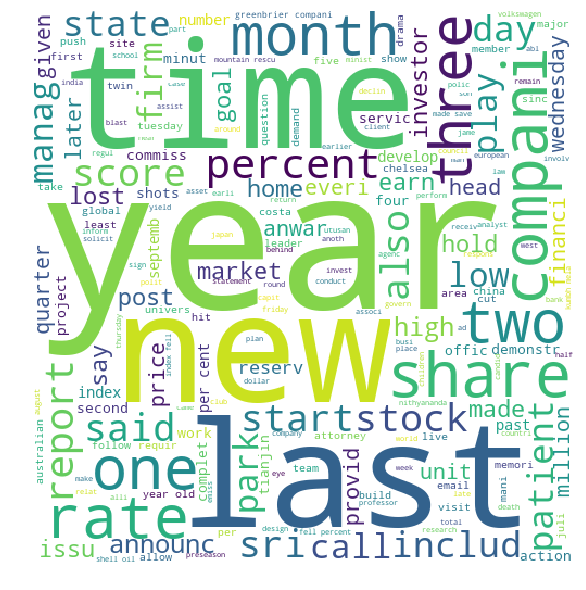

In [16]:
#cloud words for filtered dataset - this is for the factual words
fact_words = ' '.join(list(dff[dff['Tag']== 1]['Sentence']))
fact_wc = WordCloud(background_color= 'white', width = 500, height=512).generate(fact_words)
plt.figure(figsize = (10,8), facecolor = 'white')
plt.imshow(fact_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Result:** In factual articles, it is more common to find sentences that contain numerical information ( can see numbers like "three", "two", "one". Words related to time such as the words "year", "new", and "time" as well as other business-related words such as "stock", "share", "rate" are also common. This makes sense since business related news that explain stock prices, or time related articles tend to report pure facts. For instance, a news article that contains phrases like "This year, our stock prices have increased 5 percent" is more likely to be purely factual without containing opinions. 

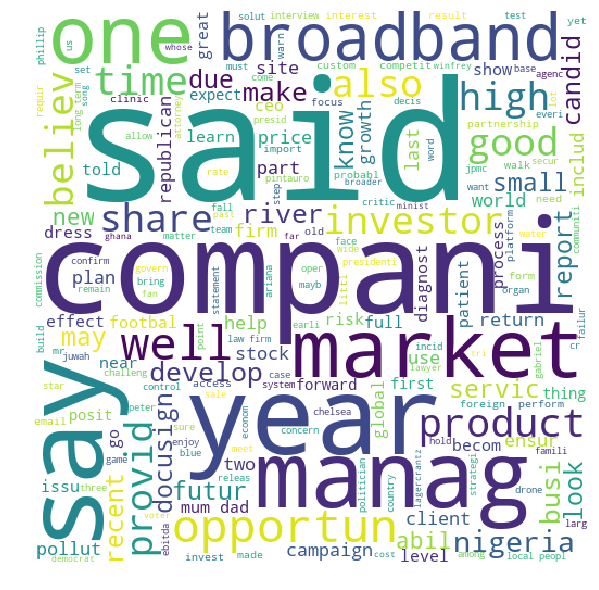

In [17]:
#cloud word for filtered dataset (nonfactual)
nonfact_words = ' '.join(list(dff[dff['Tag']== 0]['Sentence']))
nonfact_wc = WordCloud(background_color='white',width = 512, height=512).generate(nonfact_words)
plt.figure(figsize = (10,8), facecolor = 'white')
plt.imshow(nonfact_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Result:** The most common words in nonfactual articles tend to contain words like "said", "say", "market" and "compani". This makes sense since more opinionated articles would have to say words like "said" to say what one's opinion was. A sample sentence could be "He said that this company will not do well in the future." Opnionated papers could also give opinions on how companies and the overall market are doing.  

Here's the wordclouds for the unfiltered data.

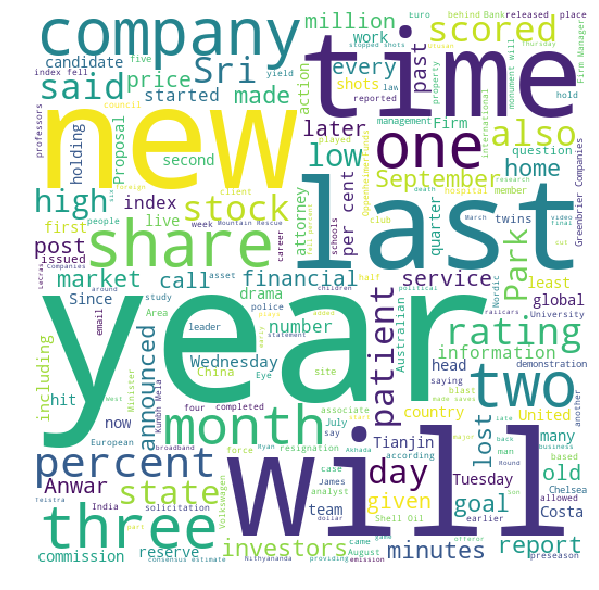

In [18]:
#the cloudword for Factual words from the unfiltered dataset
fact_words = ' '.join(list(df[df['Tag']== 1]['Sentence']))
fact_wc = WordCloud(background_color = 'white', width = 512, height=512).generate(fact_words)
plt.figure(figsize = (10,8), facecolor = 'white')
plt.imshow(fact_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

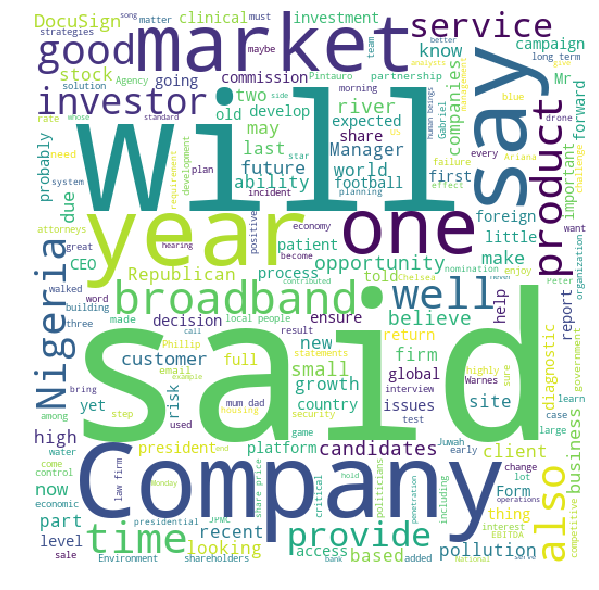

In [19]:
#Cloudword for unfiltered nonfactual words 
nonfact_words = ' '.join(list(df[df['Tag']== 0]['Sentence']))
nonfact_wc = WordCloud(background_color ='white',width = 512, height=512).generate(nonfact_words)
plt.figure(figsize = (10,8), facecolor = 'white')
plt.imshow(nonfact_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

The cloudwords surprisingly don't look that different from the cloudwords with the filtered and stemmed words. It turns out that this is because CloudWord automatically takes out the stopwords before presenting the final image.

Let's go ahead split the datasets into training and test data.

In [20]:
#define X and Y for both datasets
X= df.Sentence
y = df.Tag

Xf = dff.Sentence
yf = dff.Tag

In [21]:
#split into training and testing datasets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print X_train.shape
print X_test.shape

Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, random_state=1)
print Xf_train.shape
print Xf_test.shape

(267,)
(90,)
(267,)
(90,)


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Vectorize the data

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
# instantiate the vectorizer
v = CountVectorizer()
vf=CountVectorizer()

In [23]:
# learn training data vocabulary, then create document-term matrix
X_train_data = v.fit_transform(X_train)
X_train_data

Xf_train_data = vf.fit_transform(Xf_train)
Xf_train_data



<267x2054 sparse matrix of type '<type 'numpy.int64'>'
	with 3624 stored elements in Compressed Sparse Row format>

In [24]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_data = v.transform(X_test)
Xf_test_data = vf.transform(Xf_test)

In [25]:
#store token names into the variables Xt_tokens and Xtf_tokens
Xt_tokens =  v.get_feature_names()
Xtf_tokens = vf.get_feature_names()

In [26]:
Xt_tokens = v.get_feature_names()
Xt_count = np.sum(X_train_data.toarray(), axis =0)
print Xt_count

Xtf_tokens = vf.get_feature_names()
Xtf_count = np.sum(Xf_train_data.toarray(), axis=0)
print Xtf_count 

[5 2 1 ... 1 1 1]
[5 2 1 ... 1 1 1]


From the information below we can see that there's 2357 unique words in the unfiltered training dataset while there are 2054 in the filtered one (without stopwords, and stemmed)

In [27]:
#so there's 2357 unique words in the unfiltered training dataset, 2054 in the filtered one 
print Xt_count.shape
print Xtf_count.shape

(2357,)
(2054,)


Unsurprisingly, the most common words in the ulfiltered training dataset are stopwords (the, and, to, of, etc).

In [28]:
df_token = pd.DataFrame({'word':Xt_tokens, 'count':Xt_count})
df_token.sort_values(by='count', ascending=False)


,count,word
2112,379,the
177,183,and
2137,172,to
1471,153,of
1105,141,in
1484,78,on
916,67,for
1158,50,is
2281,48,was
2325,45,with


The table below shows the most common words in the filtered training dataset so all the stopwords are taken out. The words "said", "year", "compani" are the most common words. This isn't surprising since we've seen that these words are the largest in the Cloudword visuals. 

In [29]:
#stopwords are taken out, so many of the common words are removed
dff_token = pd.DataFrame({'word':Xtf_tokens, 'count':Xtf_count})
dff_token.sort_values(by='count', ascending=False)

,count,word
1621,32,said
2043,26,year
445,25,compani
1673,18,share
1861,17,time
1267,15,new
1088,15,last
926,13,high
1508,13,rate
1171,13,manag


Let's look at the count of words in each tag (fact and nonfactual).

In [30]:
# create separate DataFrames for fact and nonfact
non_fact = df[df.Tag==0]
fact = df[df.Tag==1]
non_factf = dff[dff.Tag==0]
factf = dff[dff.Tag==1]

In [31]:
# learn the vocabulary of ALL messages and save it
v.fit(df.Sentence)
v.fit(dff.Sentence)
# put the names of all features (tokens) into a variable
all_tokens = v.get_feature_names()
all_tokensf = v.get_feature_names()

In [32]:
# create document-term matrices for fact and nonfact

fact_doc = v.transform(fact['Sentence'])
nonfact_doc = v.transform(non_fact['Sentence'])

factf_doc = v.transform(factf['Sentence'])
nonfactf_doc = v.transform(non_factf['Sentence'])

In [33]:
# count how many times each token appears across all fact messages

fact_count = np.sum(fact_doc.toarray(), axis=0)

fact_countf = np.sum(factf_doc.toarray(), axis=0)

In [34]:
# count how many times each token appears across all nonfact messages
nonfact_count = np.sum(nonfact_doc.toarray(), axis=0)

nonfact_countf = np.sum(nonfactf_doc.toarray(), axis=0)

In [35]:
#produce list that counts number of times a token appears in a factual or nonfactual sentence (for unfiltered dataframe)
tokens= pd.DataFrame({'token':all_tokens, 'fact': fact_count, 'nonfact': nonfact_count})
tokens

,fact,nonfact,token
0,6,0,00
1,2,0,000
2,1,0,00hrs
3,1,0,03
4,1,0,06
5,1,0,0620
6,1,0,08
7,1,0,0979
8,5,2,10
9,1,0,108


In [36]:
#list for filtered dataframe
tokensf = pd.DataFrame({'token':all_tokensf, 'fact': fact_countf, 'nonfact': nonfact_countf})
tokensf

,fact,nonfact,token
0,6,0,00
1,2,0,000
2,1,0,00hrs
3,1,0,03
4,1,0,06
5,1,0,0620
6,1,0,08
7,1,0,0979
8,5,2,10
9,1,0,108


Interestingly, if the token is numeric like 0,000, 00hrs, the more likely the sentence it is in is factual. Intuitively this makes sense since sentences containing numbers tend to contain factual information like "There were 0 accidents today."

### Final Analysis: 
What did you learn about the data? How did you answer the questions? How can you justify your answers? 

As part of our final analysis, we testing two subjects. 1) Which is more accurate in determining factual and nonfactual sentences? Naive Bayes or Logistic Regression? 2) Is accuracy affected when the dataset contains stopwords?



First we tested Naive Bayes on both the filtered and unfiltered data.

In [37]:
# train a Naive Bayes model using X_train_data and Xf_train_data
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayesf = MultinomialNB()

naive_bayes.fit(X_train_data, y_train)
naive_bayesf.fit(Xf_train_data, yf_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [38]:
# make class predictions 

y_pred_class = naive_bayes.predict(X_test_data)
yf_pred_class = naive_bayesf.predict(Xf_test_data)

In [39]:
# calculate accuracy of class predictions
# compute the accuracy scores

from sklearn import metrics
NB_with_stopwords = metrics.accuracy_score(y_test, y_pred_class)
NB_without_stopwords = metrics.accuracy_score(yf_test, yf_pred_class)
print NB_with_stopwords
print NB_without_stopwords

0.6777777777777778
0.7


**Result:** Taking out the stopwords make Naive Bayes slightly more accurate. (0.6777 vs 0.7)

Next we create confusion matrices for both the unfiltered and filtered dataset.

In [40]:
# create confusion matrices
matrix =metrics.confusion_matrix(y_test, y_pred_class)
matrixf =metrics.confusion_matrix(yf_test, yf_pred_class)

Text(91.68,0.5,u'predicting labels')

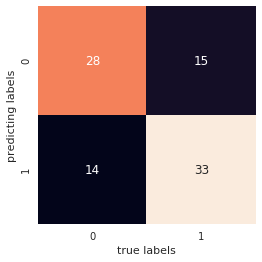

In [41]:
#display confusion matrices
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt 

#confusion matrix for unfiltered dataset
sns.heatmap(matrix.T, square = True, annot=True, fmt='d', cbar=False)
plt.xlabel('true labels')
plt.ylabel('predicting labels')

Text(91.68,0.5,u'predicting labels')

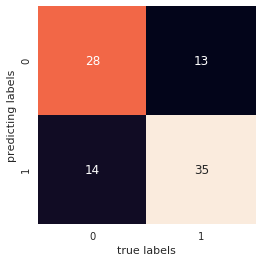

In [42]:
#confusion matrix for filtered dataset 
sns.heatmap(matrixf.T, square = True, annot=True, fmt='d', cbar=False)
plt.xlabel('true labels')
plt.ylabel('predicting labels')

Comparing the two matrices, the only improvement when taking out the stopwords is a few predictions were false negatives were fixed. Clearly, Naive Bayes is not too great at classifying factual and nonfactual sentences: there are 14 false positives and 13 false negatives.

Let's look at possible reasons as to why we are getting false negatives and positives.

In [43]:
# print message text for the false positives
print Xf_test[yf_test < yf_pred_class]

234           two hour waiting, phillip choic call help.
303    desir juwah ensur nigeria get wide rang broadb...
123    creat 25-year-old ceo ben weissenstein, gsgs b...
173    mum dad stock lost gloss, big dividend payer f...
343    near 200 page recommend conclusions, commiss t...
348    indeed, state author lead probe case forc end ...
131    digit revenu expect exceed $500 million first ...
13     data present show patient confirm partial resp...
301    accord him, lot broadband cabl shore counti ma...
27            edison report solicit buy sell securities.
89     india emerg market attract lot fdi without gbi...
112    never thought would see day fantasi book one t...
80     oakland expect sign veteran free agent taylor ...
88     one reason, last ten years, average, fdi niger...
Name: Sentence, dtype: object


Looks like false positive sentences tend to have numbers in them for instance we see "two" in "two hour", 25 in "25-year-old" and "200" in "200 page". The classifier is probably trained to see more numbers as more likely to be factual as we mentioned earlier.

In [44]:
# print message text for the false negatives
print Xf_test[yf_test > yf_pred_class]

333    landauer nordic develop sell product servic ra...
211    like candidate, wolfgang porsche, famili patri...
65      arm around one anoth whole time look total love.
354    part team run preliminari final 2011, miss clu...
163    titanium sponsor dreamforc 2015, docusign show...
119    addit information, contact hazel red 337-826-7...
270    law firm need get inform data firm manag syste...
18     studi continu enrol patient met axl gene alter...
5      ariana grand face backlash juli video releas s...
85     one differ bunker wall twin probabl wont worri...
222    oppenheimerfund oppenheimerfunds, leader globa...
205    180 million chines age 65 enorm opportun priva...
146    earli 2014, announc mountainview walker indust...
Name: Sentence, dtype: object


False negative sentence seem to have more emotion words or words relating to emotion such as "famili", "love", "miss", "worri". The classifier is trained to see emotion-related words as nonfactual. Generally, this makes sense in many cases hence the accuracy rate of the classifier is above 50%. 

Though, this information clearly show the limitation of the bag of words model when classifying sentences. It's important to not only recognize common words in sentences but also realize that the context these words are placed in are important in determining whether a sentence or an article as a whole is factual or not.

Let's try logistic regression.

In [45]:
# import, instantiat, fit data into the model
from sklearn.linear_model import LogisticRegression
# TODO
logreg = LogisticRegression()
logregf = LogisticRegression()
logreg.fit(X_train_data, y_train)
logregf.fit(Xf_train_data, yf_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
# class predictions and predicted probabilities

y_pred_class = logreg.predict(X_test_data)
yf_pred_class = logregf.predict(Xf_test_data)

In [47]:
# calculate accuracy
# TODO
LR_with_stopwords = metrics.accuracy_score(y_test, y_pred_class)
LR_without_stopwords = metrics.accuracy_score(yf_test, yf_pred_class)
print LR_with_stopwords
print LR_without_stopwords

0.6888888888888889
0.6777777777777778


Logistic regression is less accurate than Naive Bayes. Interestingly, taking out the stopwords actually make logistic regression less accurate.

Let's create the confusion matrices.

In [48]:
#create the matrices
matrix2 = metrics.confusion_matrix(y_test, y_pred_class)
matrix2f =metrics.confusion_matrix(yf_test, yf_pred_class)


Text(91.68,0.5,u'predicting labels')

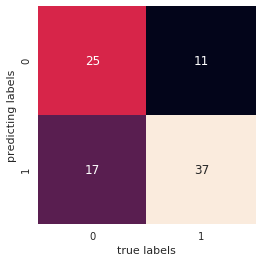

In [49]:
#confusion matrix for unfiltered data
sns.heatmap(matrix2.T, square = True, annot=True, fmt='d', cbar=False)
plt.xlabel('true labels')
plt.ylabel('predicting labels')

Text(91.68,0.5,u'predicting labels')

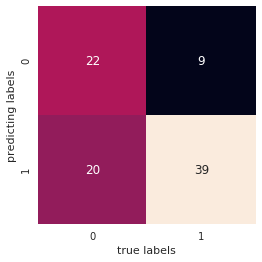

In [50]:
#confusion matrix for filtered data
sns.heatmap(matrix2f.T, square = True, annot=True, fmt='d', cbar=False)
plt.xlabel('true labels')
plt.ylabel('predicting labels')

After taking out the stopwords, there were more false positives and less false negatives. 

Let's look at them more closely:

In [51]:
# print message text for the false positives in unfiltered data
print Xf_test[y_test < y_pred_class]

234           two hour waiting, phillip choic call help.
165    compani interest learn docusign salesforc visi...
303    desir juwah ensur nigeria get wide rang broadb...
123    creat 25-year-old ceo ben weissenstein, gsgs b...
111                                           love book.
173    mum dad stock lost gloss, big dividend payer f...
131    digit revenu expect exceed $500 million first ...
120    campaign politician lectur high, local peopl c...
13     data present show patient confirm partial resp...
6      22-year-old pop star, dress sexi multicolor mi...
73                                     "they'v kick ceo.
27            edison report solicit buy sell securities.
89     india emerg market attract lot fdi without gbi...
12        also portray molli peter tv seri stuck middle.
112    never thought would see day fantasi book one t...
106    terrifi anymore. time, there aw feel of, i'm n...
88     one reason, last ten years, average, fdi niger...
Name: Sentence, dtype: object


In [52]:
# print message text for the false positives in filtered data
print Xf_test[yf_test < yf_pred_class]

234           two hour waiting, phillip choic call help.
165    compani interest learn docusign salesforc visi...
303    desir juwah ensur nigeria get wide rang broadb...
123    creat 25-year-old ceo ben weissenstein, gsgs b...
173    mum dad stock lost gloss, big dividend payer f...
348    indeed, state author lead probe case forc end ...
131    digit revenu expect exceed $500 million first ...
13     data present show patient confirm partial resp...
6      22-year-old pop star, dress sexi multicolor mi...
139    nigeria must confront abduct epidem squar abdu...
301    accord him, lot broadband cabl shore counti ma...
93     govern lever pull, jpmc actual among five fore...
27            edison report solicit buy sell securities.
89     india emerg market attract lot fdi without gbi...
306    accord publish gentri foster, vision drone coa...
122                          "but reform process, event.
12        also portray molli peter tv seri stuck middle.
112    never thought would see 

In [53]:
# print message text for the false negatives in unfiltered data
print Xf_test[y_test > y_pred_class]

333    landauer nordic develop sell product servic ra...
211    like candidate, wolfgang porsche, famili patri...
270    law firm need get inform data firm manag syste...
344    among issu addressed, commiss cite inequ uncon...
342    independ commiss state missouri releas call pe...
117    follow question-and-answ period, candid two ha...
85     one differ bunker wall twin probabl wont worri...
205    180 million chines age 65 enorm opportun priva...
146    earli 2014, announc mountainview walker indust...
256    would requir three-man panel, chelsea fa choos...
260    500 demonstr happen throughout kumbh ghat abil...
Name: Sentence, dtype: object


In [54]:
# print message text for the false negatives in filtered data
print Xf_test[yf_test > yf_pred_class]

333    landauer nordic develop sell product servic ra...
211    like candidate, wolfgang porsche, famili patri...
354    part team run preliminari final 2011, miss clu...
270    law firm need get inform data firm manag syste...
5      ariana grand face backlash juli video releas s...
85     one differ bunker wall twin probabl wont worri...
222    oppenheimerfund oppenheimerfunds, leader globa...
205    180 million chines age 65 enorm opportun priva...
146    earli 2014, announc mountainview walker indust...
Name: Sentence, dtype: object


(0.6, 0.735)

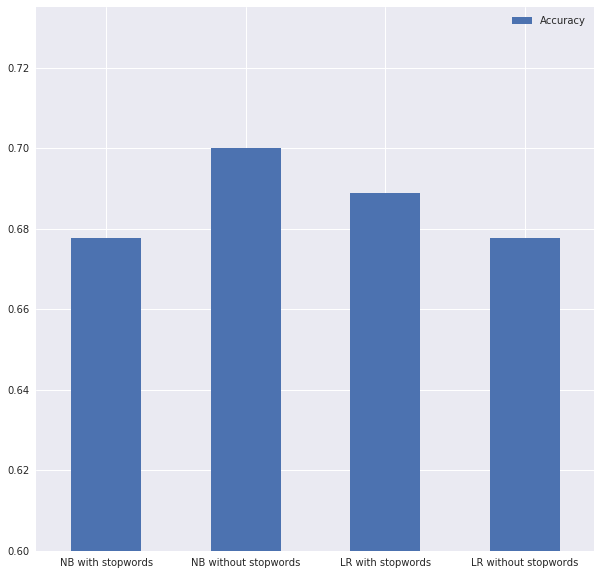

In [58]:


#histogram = pd.DataFrame({'NB with stopwords':[NB_with_stopwords], 'NB without stopwords':[NB_without_stopwords], 
                        #'LR with stopwords':[LR_with_stopwords], 'LR without stopwords':[LR_without_stopwords]})
histogram = pd.DataFrame({'Algorithm':["NB with stopwords", "NB without stopwords", "LR with stopwords", "LR without stopwords"],
                        'Accuracy':[NB_with_stopwords, NB_without_stopwords, LR_with_stopwords, LR_without_stopwords]})    
graph = histogram.plot(kind="bar", figsize=(10,10))
graph.set_xticklabels(["NB with stopwords", "NB without stopwords", "LR with stopwords", "LR without stopwords"], rotation = 0)
graph.set_ylim(ymin=0.6)

As seen, when we remove stopwords from our Naive Bayes Classifier, we get greater accuracy. However, when we remove stopwords from our Logistic Regression Algorithm, we see a slight reduction in accuracy. We believe this can mainly be attributed to the difference in the algorithms. Naive Bayes functions well with small datasets, so by removing the stopwords we have not only decreased the amount of words that are shared between factual and non-factual articles, it also has had no sizable impact on performance for Naive Bayes. However, Logistic Regression requires a large dataset to function well. Thus, although we have removed a lot of overlapping words, we have also significantly reduced the amount of data. We predict the increase in accuracy from removing stopwords and the decrease in accuracy from the decreased dataset nullify each other, causing a minor decrease in accuracy.